# plotting graph for recovered global data

In [1]:
#importing the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#importing the dataset

df=pd.read_csv('C:\\Users\\aravind\\Desktop\\VUMONIC DATALABS\\time_series_covid19_recovered_global.csv')

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,800,800,800,800,802,802,803,803,803,803
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,108,108,108,117,117,117,117,118,118,118


In [4]:
recoveries_df=df

In [5]:
cols = recoveries_df.keys()

In [6]:
recoveries= recoveries_df.loc[:, cols[4]:cols[-1]]

In [7]:
recoveries.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,0,0,0,0,0,0,0,0,0,0,...,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254
1,0,0,0,0,0,0,0,0,0,0,...,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014
2,0,0,0,0,0,0,0,0,0,0,...,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019
3,0,0,0,0,0,0,0,0,0,0,...,800,800,800,800,802,802,803,803,803,803
4,0,0,0,0,0,0,0,0,0,0,...,108,108,108,117,117,117,117,118,118,118


In [8]:
dates= recoveries.keys()

In [9]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/4/20', '7/5/20', '7/6/20', '7/7/20', '7/8/20', '7/9/20', '7/10/20',
       '7/11/20', '7/12/20', '7/13/20'],
      dtype='object', length=174)

In [10]:
world_cases = []

In [11]:
for i in dates:
    recoveries_sum = recoveries[i].sum()
    
    world_cases.append(recoveries_sum)

In [12]:
recoveries_sum

7257369

In [13]:
world_cases

[28,
 30,
 36,
 39,
 52,
 61,
 107,
 126,
 143,
 222,
 284,
 472,
 623,
 852,
 1124,
 1487,
 2011,
 2616,
 3244,
 3946,
 4683,
 5150,
 6295,
 8058,
 9395,
 10865,
 12583,
 14352,
 16121,
 18177,
 18890,
 22886,
 23394,
 25227,
 27905,
 30384,
 33277,
 36711,
 39782,
 42716,
 45602,
 48228,
 51170,
 53796,
 55865,
 58359,
 60694,
 62493,
 64404,
 67002,
 68323,
 70250,
 72621,
 76031,
 78085,
 80837,
 83320,
 84957,
 87402,
 91666,
 97881,
 98346,
 107985,
 113768,
 122133,
 130902,
 139396,
 148863,
 164300,
 177786,
 192876,
 209917,
 225364,
 245777,
 259616,
 276249,
 299637,
 328353,
 353689,
 375508,
 401755,
 421158,
 448324,
 473417,
 510084,
 540912,
 567032,
 590955,
 622609,
 644611,
 679438,
 709867,
 738658,
 788691,
 816470,
 845073,
 872876,
 906142,
 948310,
 1013281,
 1051512,
 1092429,
 1124752,
 1158816,
 1195421,
 1241339,
 1280836,
 1317358,
 1370907,
 1404501,
 1451495,
 1488530,
 1544372,
 1584107,
 1632096,
 1688687,
 1729573,
 1782471,
 1834636,
 1893549,
 19448

In [14]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# recoveries cases
world_daily_increase = daily_increase(world_cases)
world_recoveries_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

In [15]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)

In [16]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

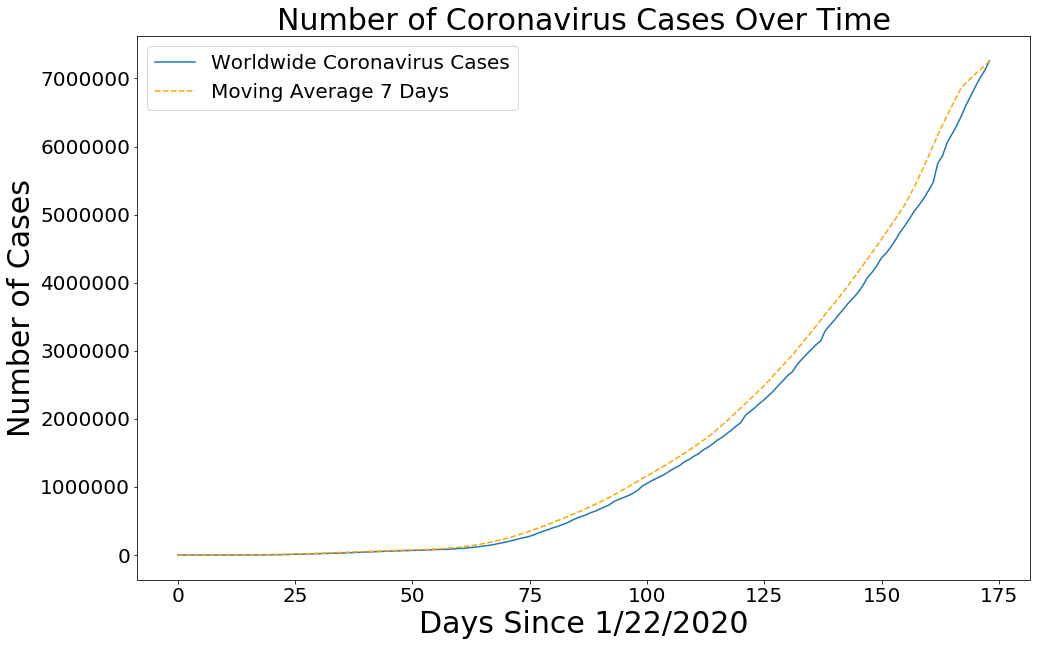

In [17]:
#plotting the graph for number of cases

adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_recoveries_avg, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

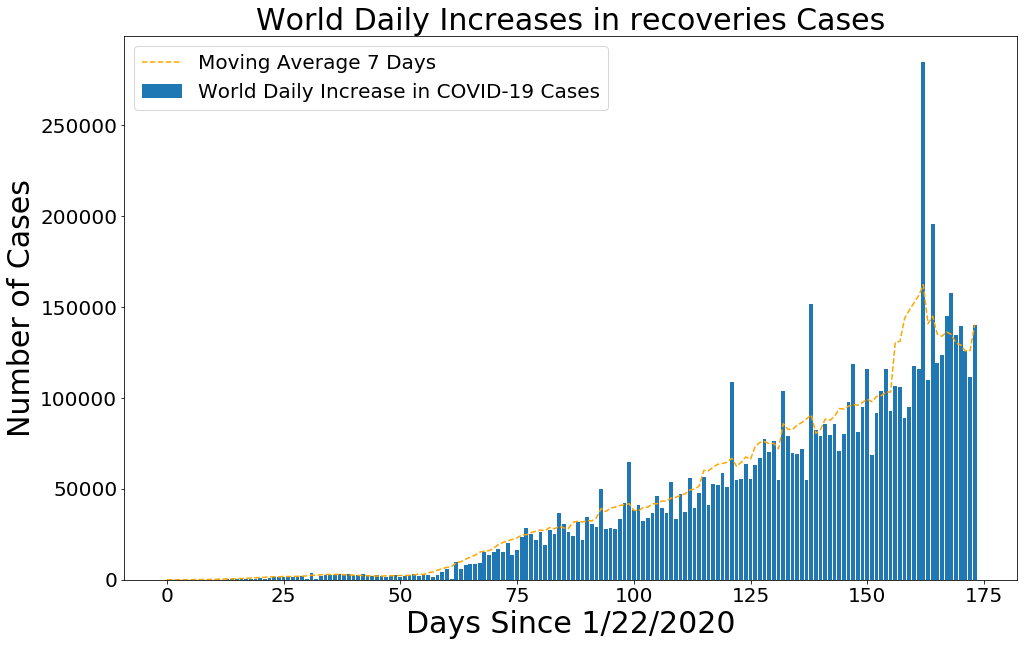

In [18]:
#plotting the graph for recoveries cases

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in recoveries Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()